# BPR_SVD_experiment

## Introduction

   The data used is u.data of ml-k100 in movielens, specifically user_id, item_id and rating. In [BPR](BPR_algorithm.ipynb), we use the number of rating greater than a certain value as implicit positive feedback, and the remaining rating is regarded as no feedback in the data. The concentration is expressed as (user_id, item_id, rating=0/1). In SVD we still use the rating score as the data for prediction. We compare the Top-N recommendation lists from the two models and finally compare the two models using the indicators.

## Algorithm

### BPR

BPR Cost Function:
\begin{align}
ln\;P(\theta|>_u) \propto ln\;P(>_u|\theta)P(\theta) &= ln\;\prod\limits_{(u,i,j) \in D} \sigma(\overline{x}_{ui} - \overline{x}_{uj}) + ln P(\theta) \\
&= \sum\limits_{(u,i,j) \in D}ln\sigma(\overline{x}_{ui} - \overline{x}_{uj}) + \lambda||\theta||^2\;
\end{align}

Input: existing data set $D$, learning rate $\alpha$, regularization parameter $\lambda$, eigenvalue dimension $k$

Output: Model parameters, ie matrix $W$, $H$

Steps:
> 1. initialize $W,H$

> 2. Iteratively update the parameters, the formula is as follows：
\begin{align}
w_{uf} &= w_{uf} + \alpha(\sum\limits_{(u,i,j)\in D}\frac{1}{1+e^{\overline{x}_{ui} - \overline{x}_{uj}}}(h_{if}-h_{jf})+\lambda w_{uf})\\
h_{if} &= h_{if} + \alpha(\sum\limits_{(u,i,j)\in D}\frac{1}{1+e^{\overline{x}_{ui} - \overline{x}_{uj}}}w_{uf} + \lambda h_{if})\\
h_{jf} &= h_{jf} + \sum\limits_{(u,i,j)\in D}\frac{1}{1+e^{\overline{x}_{ui} - \overline{x}_{uj}}}(-w_{uf}) + \lambda h_{jf})
\end{align}

> 3.Repeat step 2 until $W, H$ converges, output $W, H$

> 4.Calculate the preference value of each user for the item by $W, H$, sort the items according to the preference value, and finally give the highest ranked $n$ items

### SVD++

<center> $ \hat{r_{ui}} = b_{ui} + q_i^T (p_u + |N_{(u)}|^{-\frac{1}{2}} \sum\limits_{j \in N_{(u)}}y_j) $ $\quad (q_i,p_u \in R^f ，下同)$ </center>

Cost function:
<center>$ C(q_i, p_u, b_u, b_i, y_j) =\frac{1}{2} \sum\limits_{(u,i) \in \kappa}\{(r_{ui} - \hat{r}_{ui})^2 + \lambda(||q_i||^2 + ||p_u||^2 + b_u^2 + b_i^2 + y_j^2)\}$</center>

error term:
\begin{align}
error = r_{ui} - \hat{r}_{ui}
\end{align}

Input: existing data set $R$ , learning rate $\alpha$, regularization parameter $\lambda$, eigenvalue dimension $k$

Output: Model parameters, ie matrix $P$,$Q$,$Bu$,$Bi$,$Y$

Steps:

>1. initialize $P$ ,$Q$,$Bu$,$Bi$,$Y$

>2. Iteratively update the parameters, by Stochastic Gradient Descent(SGD):
>\begin{align}
 b_u :&= b_u + \alpha(error - \lambda \cdot b_u)\\
 b_i :&= b_i + \alpha(error - \lambda \cdot b_i)\\
 p_u :&= p_u + \alpha(error \cdot q_i - \lambda \cdot p_u)\\
 q_i :&= q_i + \alpha(error \cdot (p_u +|N_{(u)}|^{-\frac{1}{2}} \sum\limits_{j \in N_{(u)}}y_j) - \lambda \cdot q_i)\\
 y_j :&= y_j + \alpha(error \cdot q_i \cdot |N_{(u)}|^{-\frac{1}{2}}  - \lambda \cdot y_j)
\end{align}

>3.Repeat step 2 until  $P$ ,$Q$, $Bu$, $Bi$,$Y$  converges, output  them

>4.Calculate the predict rating value of each user for the item

## Experiment

Get The data from internet or local file.

In [8]:
import os
import pandas as pd
file_dir = 'ml-100k'
file_path = os.path.join(file_dir, 'u.data')
if not os.path.isdir(file_dir):
    call(['curl', '-O', 'http://files.grouplens.org/datasets/movielens/' + file_dir + '.zip'])
    call(['unzip', file_dir + '.zip'])

# we will not be using the timestamp column
names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv(file_path, sep = '\t', names = names)
print('data dimension: \n', df.shape)
df

data dimension: 
 (100000, 4)


,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


### BPR Evaluate

In [3]:
from BPR import *
items_col = 'item_id'
users_col = 'user_id'
ratings_col = 'rating'
threshold = 3
X, df_2 = create_matrix(df, users_col, items_col, ratings_col, threshold)
X_train, X_test = create_train_test(X, test_size = 0.2, seed = 1234)

C:\Users\lenovo\Desktop\RS_AE\BPR_all\BPR.py:328: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[ratings_col] = 1
C:\Users\lenovo\Desktop\RS_AE\BPR_all\BPR.py:331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[col] = data[col].astype('category')


#### with fixed other parameters and then change number of recomm-items

In [11]:
# parameters were randomly chosen
bpr_params = {'reg': 0.01,
              'learning_rate': 0.01,
              'n_iters': 160,
              'n_factors': 15,
              'batch_size': 100}
bpr = BPR(**bpr_params)
bpr.fit(X_train)

BPR: 100%|███████████████████████████████████████████████████████████████████████████| 160/160 [00:01<00:00, 92.73it/s]


- recall rate

In [12]:
rc_list_bpr=[]
for num in [10,50,100,150,200,250,300]:
    rc = recall_bpr(bpr,X_train,X_test,num)
    rc_list_bpr.append(rc)
rc_list_bpr

[0.004265655548314474,
 0.024882990698501094,
 0.054031636945316666,
 0.08519462053439185,
 0.11635760412346703,
 0.1508383198056757,
 0.1875703536939392]

- precision rate

In [13]:
preci_list_bpr=[]
for num in [10,50,100,150,200,250,300]:
    preci = precision_bpr(bpr,X_train,X_test,num)
    preci_list_bpr.append(preci)
preci_list_bpr

[0.007635206786850477,
 0.008907741251325556,
 0.009671261930010604,
 0.010166136443973135,
 0.010413573700954401,
 0.010799575821845176,
 0.01119123365146695]

#### with fixed other parameters and then change number of factors

- recall rate

In [9]:
rc_bpr_fac = []
for factors in [10,20,30,40,50,60,70,80,90,100]:
    bpr_params = {'reg': 0.01,
                  'learning_rate': 0.01,
                  'n_iters': 160,
                  'n_factors': factors,
                  'batch_size': 100}

    bpr = BPR(**bpr_params)
    bpr.fit(X_train)
    rc = recall_bpr(bpr,X_train,X_test)
    rc_bpr_fac.append(rc)
rc_bpr_fac

BPR: 100%|███████████████████████████████████████████████████████████████████████████| 160/160 [00:01<00:00, 84.20it/s]


[0.002666034717696546,
 0.0017181112625155519,
 0.002310563422003673,
 0.0019550921263108,
 0.0027252799336453582,
 0.003495467740979916,
 0.0024882990698501094,
 0.0020143373422596127,
 0.001777356478464364,
 0.002666034717696546]

- precision rate

In [10]:
preci_bpr_fac = []
for factors in [10,20,30,40,50,60,70,80,90,100]:
    bpr_params = {'reg': 0.01,
                  'learning_rate': 0.01,
                  'n_iters': 160,
                  'n_factors': factors,
                  'batch_size': 100}

    bpr = BPR(**bpr_params)
    bpr.fit(X_train)
    preci = precision_bpr(bpr,X_train,X_test)
    preci_bpr_fac.append(preci)
preci_bpr_fac

BPR: 100%|███████████████████████████████████████████████████████████████████████████| 160/160 [00:01<00:00, 86.12it/s]


[0.009544008483563097,
 0.007635206786850477,
 0.008695652173913044,
 0.008695652173913044,
 0.009968186638388122,
 0.012089077412513256,
 0.008695652173913044,
 0.008059384941675504,
 0.007423117709437964,
 0.009331919406150583]

### SVD++ Evaluate

#### with fixed other parameters and then change number of recomm-items

In [19]:
from SVDpp import *
svdpp = SVDPP()
RS = run_func(init_model=svdpp.init_model,train_model=svdpp.train_model,predict=svdpp.predict)

80023
19977
cold start users count 0
{
    'dataset_name': 'u',
    'k_fold_num': 5,
    'k_test': 0,
    'rating_path': 'Z:/RSA/data/u_ratings.txt',
    'rating_cv_path': 'Z:/RSA/data/cv/',
    'trust_path': 'Z:/RSA/data/u_trust.txt',
    'sep': ' ',
    'random_state': 0,
    'size': 0.8,
    'min_val': 0.5,
    'max_val': 4.0,
    'coldUserRating': 5,
    'factor': 10,
    'threshold': 0.0001,
    'lr': 0.01,
    'maxIter': 100,
    'lambdaP': 0.001,
    'lambdaQ': 0.001,
    'gamma': 0,
    'isEarlyStopping': False,
    'result_path': '../results/',
    'model_path': 'model/',
    'result_log_path': 'log/'
}
80023
19977
cold start users count 0
80023
19977
cold start users count 0
<class 'data.RSContext'> iteration 1: loss = 35127.9838, delta_loss = -35127.98383 learning_Rate = 0.01000 rmse=1.12749 mae=0.87977
<class 'data.RSContext'> iteration 2: loss = 8104.8620, delta_loss = 27023.12188 learning_Rate = 0.01000 rmse=1.02719 mae=0.80131
<class 'data.RSContext'> iteration 3: loss =

<class 'data.RSContext'> iteration 123: loss = 3665.2650, delta_loss = 5.41019 learning_Rate = 0.01000 rmse=0.99669 mae=0.77342
<class 'data.RSContext'> iteration 124: loss = 3659.9403, delta_loss = 5.32477 learning_Rate = 0.01000 rmse=0.99686 mae=0.77349
<class 'data.RSContext'> iteration 125: loss = 3654.6990, delta_loss = 5.24130 learning_Rate = 0.01000 rmse=0.99702 mae=0.77356
<class 'data.RSContext'> iteration 126: loss = 3649.5393, delta_loss = 5.15970 learning_Rate = 0.01000 rmse=0.99718 mae=0.77362
<class 'data.RSContext'> iteration 127: loss = 3644.4593, delta_loss = 5.07994 learning_Rate = 0.01000 rmse=0.99734 mae=0.77369
<class 'data.RSContext'> iteration 128: loss = 3639.4574, delta_loss = 5.00196 learning_Rate = 0.01000 rmse=0.99751 mae=0.77376
<class 'data.RSContext'> iteration 129: loss = 3634.5317, delta_loss = 4.92571 learning_Rate = 0.01000 rmse=0.99767 mae=0.77383
<class 'data.RSContext'> iteration 130: loss = 3629.6805, delta_loss = 4.85114 learning_Rate = 0.01000 r

- recall rate

In [20]:
rc_list_svd=[]
for num in [10,50,100,150,200,250,300]:
    rc = recall_svd(RS,num)
    rc_list_svd.append(rc)
rc_list_svd

[0.009711167843019472,
 0.06532512389247634,
 0.133053010962607,
 0.193672723632177,
 0.25093857936627123,
 0.3025479301196376,
 0.3497522150473044]

- precision rate

In [21]:
preci_list_svd=[]
for num in [10,50,100,150,200,250,300]:
    preci = precision_svd(RS,num)
    preci_list_svd.append(preci)
preci_list_svd

[0.020572640509013786,
 0.02767762460233298,
 0.028186638388123013,
 0.02735242135030046,
 0.026580063626723223,
 0.025637327677624604,
 0.024697773064687168]

#### with fixed other parameters and then change number of factors

- recall rate and precision rate

In [199]:
rc_svd_fac = []
preci_svd_fac = []
for factors in [10,20,30,40,50,60,70,80,90,100]:
    f = {'factors':factors}
    svdpp = SVDPP(**f)
    temp_svd = run_func(init_model=svdpp.init_model,train_model=svdpp.train_model,predict = svdpp.predict)
    rc = recall_svd(temp_svd)
    rc_svd_fac.append(rc)
    preci = precision_svd(temp_svd)
    preci_svd_fac.append(preci)

80023
19977
cold start users count 0
{
    'dataset_name': 'u',
    'k_fold_num': 5,
    'k_test': 0,
    'rating_path': 'Z:/RSA/data/u_ratings.txt',
    'rating_cv_path': 'Z:/RSA/data/cv/',
    'trust_path': 'Z:/RSA/data/u_trust.txt',
    'sep': ' ',
    'random_state': 0,
    'size': 0.8,
    'min_val': 0.5,
    'max_val': 4.0,
    'coldUserRating': 5,
    'factor': 10,
    'threshold': 0.0001,
    'lr': 0.01,
    'maxIter': 100,
    'lambdaP': 0.001,
    'lambdaQ': 0.001,
    'gamma': 0,
    'isEarlyStopping': False,
    'result_path': '../results/',
    'model_path': 'model/',
    'result_log_path': 'log/'
}
80023
19977
cold start users count 0
80023
19977
cold start users count 0
<class 'data.RSContext'> iteration 1: loss = 33238.4053, delta_loss = -33238.40526 learning_Rate = 0.01000 rmse=1.11850 mae=0.87399
<class 'data.RSContext'> iteration 2: loss = 7820.2714, delta_loss = 25418.13385 learning_Rate = 0.01000 rmse=1.02146 mae=0.79706
<class 'data.RSContext'> iteration 3: loss =

<class 'data.RSContext'> iteration 122: loss = 2506.8183, delta_loss = 7.33158 learning_Rate = 0.01000 rmse=1.03952 mae=0.80433
<class 'data.RSContext'> iteration 123: loss = 2499.6097, delta_loss = 7.20858 learning_Rate = 0.01000 rmse=1.03990 mae=0.80459
<class 'data.RSContext'> iteration 124: loss = 2492.5211, delta_loss = 7.08864 learning_Rate = 0.01000 rmse=1.04026 mae=0.80483
<class 'data.RSContext'> iteration 125: loss = 2485.5494, delta_loss = 6.97167 learning_Rate = 0.01000 rmse=1.04062 mae=0.80508
<class 'data.RSContext'> iteration 126: loss = 2478.6918, delta_loss = 6.85758 learning_Rate = 0.01000 rmse=1.04099 mae=0.80532
<class 'data.RSContext'> iteration 127: loss = 2471.9456, delta_loss = 6.74627 learning_Rate = 0.01000 rmse=1.04134 mae=0.80556
<class 'data.RSContext'> iteration 128: loss = 2465.3079, delta_loss = 6.63766 learning_Rate = 0.01000 rmse=1.04170 mae=0.80581
<class 'data.RSContext'> iteration 129: loss = 2458.7762, delta_loss = 6.53167 learning_Rate = 0.01000 r

<class 'data.RSContext'> iteration 84: loss = 2244.0766, delta_loss = 18.55634 learning_Rate = 0.01000 rmse=1.02440 mae=0.79817
<class 'data.RSContext'> iteration 85: loss = 2225.9805, delta_loss = 18.09614 learning_Rate = 0.01000 rmse=1.02532 mae=0.79876
<class 'data.RSContext'> iteration 86: loss = 2208.3287, delta_loss = 17.65179 learning_Rate = 0.01000 rmse=1.02622 mae=0.79933
<class 'data.RSContext'> iteration 87: loss = 2191.1060, delta_loss = 17.22265 learning_Rate = 0.01000 rmse=1.02711 mae=0.79990
<class 'data.RSContext'> iteration 88: loss = 2174.2979, delta_loss = 16.80808 learning_Rate = 0.01000 rmse=1.02798 mae=0.80045
<class 'data.RSContext'> iteration 89: loss = 2157.8904, delta_loss = 16.40751 learning_Rate = 0.01000 rmse=1.02884 mae=0.80099
<class 'data.RSContext'> iteration 90: loss = 2141.8701, delta_loss = 16.02035 learning_Rate = 0.01000 rmse=1.02969 mae=0.80153
<class 'data.RSContext'> iteration 91: loss = 2126.2240, delta_loss = 15.64606 learning_Rate = 0.01000 r

<class 'data.RSContext'> iteration 45: loss = 3279.3136, delta_loss = 68.12319 learning_Rate = 0.01000 rmse=0.98256 mae=0.76903
<class 'data.RSContext'> iteration 46: loss = 3213.2706, delta_loss = 66.04302 learning_Rate = 0.01000 rmse=0.98343 mae=0.76952
<class 'data.RSContext'> iteration 47: loss = 3149.2774, delta_loss = 63.99316 learning_Rate = 0.01000 rmse=0.98435 mae=0.77006
<class 'data.RSContext'> iteration 48: loss = 3087.2977, delta_loss = 61.97975 learning_Rate = 0.01000 rmse=0.98531 mae=0.77062
<class 'data.RSContext'> iteration 49: loss = 3027.2899, delta_loss = 60.00779 learning_Rate = 0.01000 rmse=0.98632 mae=0.77124
<class 'data.RSContext'> iteration 50: loss = 2969.2086, delta_loss = 58.08132 learning_Rate = 0.01000 rmse=0.98736 mae=0.77189
<class 'data.RSContext'> iteration 51: loss = 2913.0051, delta_loss = 56.20347 learning_Rate = 0.01000 rmse=0.98844 mae=0.77256
<class 'data.RSContext'> iteration 52: loss = 2858.6285, delta_loss = 54.37662 learning_Rate = 0.01000 r

<class 'data.RSContext'> iteration 6: loss = 6174.4558, delta_loss = 88.45345 learning_Rate = 0.01000 rmse=0.99207 mae=0.77805
<class 'data.RSContext'> iteration 7: loss = 6103.2418, delta_loss = 71.21402 learning_Rate = 0.01000 rmse=0.99092 mae=0.77747
<class 'data.RSContext'> iteration 8: loss = 6040.8975, delta_loss = 62.34430 learning_Rate = 0.01000 rmse=0.99002 mae=0.77700
<class 'data.RSContext'> iteration 9: loss = 5983.2326, delta_loss = 57.66486 learning_Rate = 0.01000 rmse=0.98930 mae=0.77661
<class 'data.RSContext'> iteration 10: loss = 5927.7759, delta_loss = 55.45677 learning_Rate = 0.01000 rmse=0.98868 mae=0.77622
<class 'data.RSContext'> iteration 11: loss = 5872.8945, delta_loss = 54.88140 learning_Rate = 0.01000 rmse=0.98810 mae=0.77586
<class 'data.RSContext'> iteration 12: loss = 5817.4149, delta_loss = 55.47959 learning_Rate = 0.01000 rmse=0.98751 mae=0.77549
<class 'data.RSContext'> iteration 13: loss = 5760.4389, delta_loss = 56.97601 learning_Rate = 0.01000 rmse=

<class 'data.RSContext'> iteration 134: loss = 837.4833, delta_loss = 6.54493 learning_Rate = 0.01000 rmse=1.06119 mae=0.82272
<class 'data.RSContext'> iteration 135: loss = 831.0580, delta_loss = 6.42526 learning_Rate = 0.01000 rmse=1.06181 mae=0.82318
<class 'data.RSContext'> iteration 136: loss = 824.7493, delta_loss = 6.30866 learning_Rate = 0.01000 rmse=1.06243 mae=0.82364
<class 'data.RSContext'> iteration 137: loss = 818.5543, delta_loss = 6.19504 learning_Rate = 0.01000 rmse=1.06304 mae=0.82409
<class 'data.RSContext'> iteration 138: loss = 812.4700, delta_loss = 6.08430 learning_Rate = 0.01000 rmse=1.06364 mae=0.82453
<class 'data.RSContext'> iteration 139: loss = 806.4936, delta_loss = 5.97635 learning_Rate = 0.01000 rmse=1.06424 mae=0.82497
<class 'data.RSContext'> iteration 140: loss = 800.6225, delta_loss = 5.87110 learning_Rate = 0.01000 rmse=1.06483 mae=0.82540
<class 'data.RSContext'> iteration 141: loss = 794.8541, delta_loss = 5.76846 learning_Rate = 0.01000 rmse=1.06

<class 'data.RSContext'> iteration 95: loss = 988.4981, delta_loss = 15.11109 learning_Rate = 0.01000 rmse=1.03703 mae=0.80828
<class 'data.RSContext'> iteration 96: loss = 973.7937, delta_loss = 14.70438 learning_Rate = 0.01000 rmse=1.03797 mae=0.80897
<class 'data.RSContext'> iteration 97: loss = 959.4816, delta_loss = 14.31212 learning_Rate = 0.01000 rmse=1.03890 mae=0.80965
<class 'data.RSContext'> iteration 98: loss = 945.5479, delta_loss = 13.93368 learning_Rate = 0.01000 rmse=1.03982 mae=0.81033
<class 'data.RSContext'> iteration 99: loss = 931.9794, delta_loss = 13.56849 learning_Rate = 0.01000 rmse=1.04073 mae=0.81100
<class 'data.RSContext'> iteration 100: loss = 918.7634, delta_loss = 13.21598 learning_Rate = 0.01000 rmse=1.04162 mae=0.81166
<class 'data.RSContext'> iteration 101: loss = 905.8878, delta_loss = 12.87562 learning_Rate = 0.01000 rmse=1.04250 mae=0.81231
<class 'data.RSContext'> iteration 102: loss = 893.3409, delta_loss = 12.54690 learning_Rate = 0.01000 rmse=1

<class 'data.RSContext'> iteration 57: loss = 1940.8540, delta_loss = 54.03976 learning_Rate = 0.01000 rmse=0.98319 mae=0.76877
<class 'data.RSContext'> iteration 58: loss = 1888.7747, delta_loss = 52.07933 learning_Rate = 0.01000 rmse=0.98434 mae=0.76961
<class 'data.RSContext'> iteration 59: loss = 1838.5860, delta_loss = 50.18870 learning_Rate = 0.01000 rmse=0.98549 mae=0.77045
<class 'data.RSContext'> iteration 60: loss = 1790.2185, delta_loss = 48.36752 learning_Rate = 0.01000 rmse=0.98666 mae=0.77129
<class 'data.RSContext'> iteration 61: loss = 1743.6035, delta_loss = 46.61496 learning_Rate = 0.01000 rmse=0.98782 mae=0.77213
<class 'data.RSContext'> iteration 62: loss = 1698.6737, delta_loss = 44.92981 learning_Rate = 0.01000 rmse=0.98898 mae=0.77297
<class 'data.RSContext'> iteration 63: loss = 1655.3631, delta_loss = 43.31056 learning_Rate = 0.01000 rmse=0.99014 mae=0.77382
<class 'data.RSContext'> iteration 64: loss = 1613.6077, delta_loss = 41.75548 learning_Rate = 0.01000 r

<class 'data.RSContext'> iteration 19: loss = 5312.3757, delta_loss = 83.09183 learning_Rate = 0.01000 rmse=0.98185 mae=0.77126
<class 'data.RSContext'> iteration 20: loss = 5224.4885, delta_loss = 87.88716 learning_Rate = 0.01000 rmse=0.98087 mae=0.77042
<class 'data.RSContext'> iteration 21: loss = 5131.9412, delta_loss = 92.54735 learning_Rate = 0.01000 rmse=0.97985 mae=0.76953
<class 'data.RSContext'> iteration 22: loss = 5035.0216, delta_loss = 96.91961 learning_Rate = 0.01000 rmse=0.97877 mae=0.76857
<class 'data.RSContext'> iteration 23: loss = 4934.1550, delta_loss = 100.86654 learning_Rate = 0.01000 rmse=0.97766 mae=0.76758
<class 'data.RSContext'> iteration 24: loss = 4829.8754, delta_loss = 104.27967 learning_Rate = 0.01000 rmse=0.97655 mae=0.76660
<class 'data.RSContext'> iteration 25: loss = 4722.7857, delta_loss = 107.08971 learning_Rate = 0.01000 rmse=0.97547 mae=0.76564
<class 'data.RSContext'> iteration 26: loss = 4613.5151, delta_loss = 109.27058 learning_Rate = 0.010

<class 'data.RSContext'> iteration 146: loss = 313.2747, delta_loss = 3.97208 learning_Rate = 0.01000 rmse=1.04521 mae=0.81330
<class 'data.RSContext'> iteration 147: loss = 309.3852, delta_loss = 3.88947 learning_Rate = 0.01000 rmse=1.04558 mae=0.81358
<class 'data.RSContext'> iteration 148: loss = 305.5761, delta_loss = 3.80911 learning_Rate = 0.01000 rmse=1.04593 mae=0.81385
<class 'data.RSContext'> iteration 149: loss = 301.8452, delta_loss = 3.73095 learning_Rate = 0.01000 rmse=1.04629 mae=0.81412
<class 'data.RSContext'> iteration 150: loss = 298.1903, delta_loss = 3.65490 learning_Rate = 0.01000 rmse=1.04664 mae=0.81438
<class 'data.RSContext'> iteration 151: loss = 294.6094, delta_loss = 3.58089 learning_Rate = 0.01000 rmse=1.04699 mae=0.81465
<class 'data.RSContext'> iteration 152: loss = 291.1005, delta_loss = 3.50887 learning_Rate = 0.01000 rmse=1.04733 mae=0.81490
<class 'data.RSContext'> iteration 153: loss = 287.6617, delta_loss = 3.43876 learning_Rate = 0.01000 rmse=1.04

<class 'data.RSContext'> iteration 108: loss = 473.0237, delta_loss = 9.48110 learning_Rate = 0.01000 rmse=1.02151 mae=0.79752
<class 'data.RSContext'> iteration 109: loss = 463.8152, delta_loss = 9.20856 learning_Rate = 0.01000 rmse=1.02207 mae=0.79793
<class 'data.RSContext'> iteration 110: loss = 454.8694, delta_loss = 8.94575 learning_Rate = 0.01000 rmse=1.02262 mae=0.79833
<class 'data.RSContext'> iteration 111: loss = 446.1771, delta_loss = 8.69227 learning_Rate = 0.01000 rmse=1.02317 mae=0.79872
<class 'data.RSContext'> iteration 112: loss = 437.7294, delta_loss = 8.44776 learning_Rate = 0.01000 rmse=1.02370 mae=0.79911
<class 'data.RSContext'> iteration 113: loss = 429.5176, delta_loss = 8.21183 learning_Rate = 0.01000 rmse=1.02423 mae=0.79950
<class 'data.RSContext'> iteration 114: loss = 421.5334, delta_loss = 7.98415 learning_Rate = 0.01000 rmse=1.02475 mae=0.79988
<class 'data.RSContext'> iteration 115: loss = 413.7690, delta_loss = 7.76438 learning_Rate = 0.01000 rmse=1.02

<class 'data.RSContext'> iteration 69: loss = 1097.8017, delta_loss = 34.76126 learning_Rate = 0.01000 rmse=0.98904 mae=0.77432
<class 'data.RSContext'> iteration 70: loss = 1064.3930, delta_loss = 33.40870 learning_Rate = 0.01000 rmse=0.98993 mae=0.77497
<class 'data.RSContext'> iteration 71: loss = 1032.2789, delta_loss = 32.11414 learning_Rate = 0.01000 rmse=0.99080 mae=0.77562
<class 'data.RSContext'> iteration 72: loss = 1001.4037, delta_loss = 30.87520 learning_Rate = 0.01000 rmse=0.99166 mae=0.77627
<class 'data.RSContext'> iteration 73: loss = 971.7141, delta_loss = 29.68956 learning_Rate = 0.01000 rmse=0.99251 mae=0.77690
<class 'data.RSContext'> iteration 74: loss = 943.1592, delta_loss = 28.55495 learning_Rate = 0.01000 rmse=0.99334 mae=0.77752
<class 'data.RSContext'> iteration 75: loss = 915.6900, delta_loss = 27.46918 learning_Rate = 0.01000 rmse=0.99416 mae=0.77813
<class 'data.RSContext'> iteration 76: loss = 889.2598, delta_loss = 26.43013 learning_Rate = 0.01000 rmse=

In [202]:
rc_svd_fac

[0.004455123391900686,
 0.008259498423186665,
 0.009711167843019472,
 0.013165139910897532,
 0.012214046153076037,
 0.0123141612854783,
 0.013165139910897532,
 0.01191370075586925,
 0.012514391550282826,
 0.010762376733243229]

In [203]:
preci_svd_fac

[0.01887592788971368,
 0.03499469777306469,
 0.04114528101802757,
 0.055779427359490985,
 0.05174973488865323,
 0.05217391304347826,
 0.055779427359490985,
 0.05047720042417816,
 0.053022269353128315,
 0.04559915164369035]

### Compare

#### with fixed other parameters and then change number of recomm-items

**Plot all recall curve and precision curve**

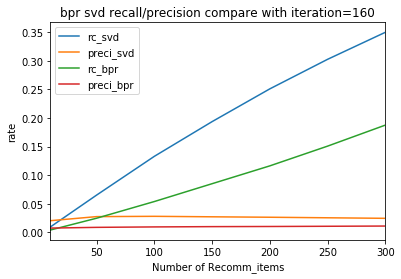

In [25]:
import matplotlib as mpl
from matplotlib import pyplot as plt
bpr_svd = pd.DataFrame(index = [10,50,100,150,200,250,300],columns = ['rc_svd','preci_svd','rc_bpr','preci_bpr'])
bpr_svd.rc_svd = rc_list_svd
bpr_svd.preci_svd = preci_list_svd
bpr_svd.rc_bpr = rc_list_bpr
bpr_svd.preci_bpr = preci_list_bpr
bpr_svd
bpr_svd.plot.line()
plt.xlabel('Number of Recomm_items')
plt.ylabel('rate')
plt.title('bpr svd recall/precision compare with iteration=160')
plt.show()

As the number of recommended items increases, the recall rate continues to rise for BPR but its precision is always at a lower level in the figure. For SVD, the recall rate also continues to rise, and the precision rate will continue to decline. In comparison, SVD's precision and recall rate are higher than BPR.

**Plot precision-recall curve**

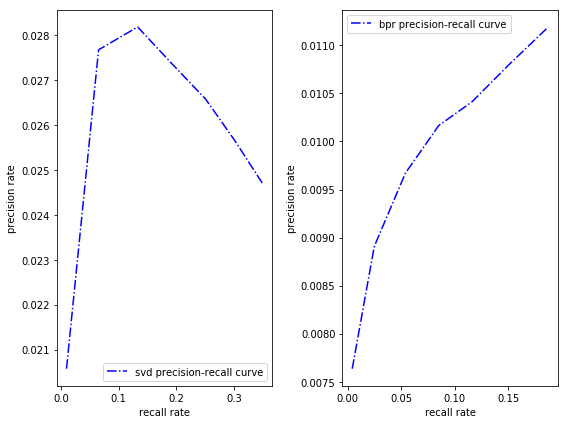

In [43]:
plt.figure(figsize=(8, 6))   
plt.subplot(1,2,1) 
p1 = bpr_svd.sort_values(by='rc_svd')
plt.plot(p1.rc_svd,p1.preci_svd,"b",label='svd precision-recall curve',linestyle='-.')
plt.legend()
plt.xlabel("recall rate")
plt.ylabel("precision rate")

plt.subplot(1,2,2)    
p2 = bpr_svd.sort_values(by='rc_bpr')
plt.plot(p2.rc_bpr,p2.preci_bpr,"b",label='bpr precision-recall curve',linestyle='-.')  
plt.legend()
plt.xlabel("recall rate")
plt.ylabel("precision rate")
plt.tight_layout()

plt.show()

In the Precision-Recall curve, we find that BPR presents a significantly inverse trend, and SVD will initially rise sharply until it reaches a highest and then inversely proportional.

**plot f-scores curve**

In [27]:
bpr_svd['f_value_svd'] = 2*bpr_svd.rc_svd*bpr_svd.preci_svd/(bpr_svd.rc_svd + bpr_svd.preci_svd)
bpr_svd['f_value_bpr'] = 2*bpr_svd.rc_bpr*bpr_svd.preci_bpr/(bpr_svd.rc_bpr + bpr_svd.preci_bpr)

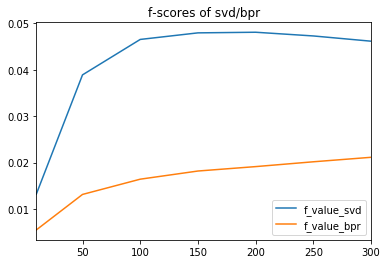

In [28]:
bpr_svd[['f_value_svd','f_value_bpr']].plot()
plt.title("f-scores of svd/bpr")
plt.show()

The f value of SVD is significantly larger than BPR, so the accuracy and recall rate of SVD is more effective.

#### with fixed other parameters and then change number of factors

**Plot all recall curve and precision curve**

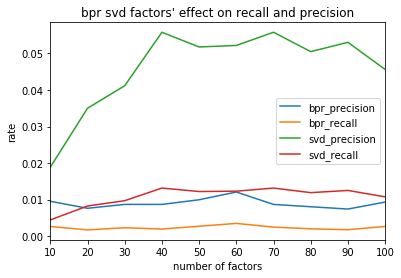

In [29]:
bpr_svd_factors = pd.DataFrame(index=[10,20,30,40,50,60,70,80,90,100],columns=['bpr_precision','bpr_recall','svd_precision','svd_recall'])
bpr_svd_factors.svd_recall = rc_svd_fac
bpr_svd_factors.svd_precision = preci_svd_fac
bpr_svd_factors.bpr_recall = rc_bpr_fac
bpr_svd_factors.bpr_precision = preci_bpr_fac
bpr_svd_factors.plot()
plt.xlabel("number of factors")
plt.ylabel("rate")
plt.title("bpr svd factors' effect on recall and precision")
plt.show()

With the increase in the number of factors, SVD++'s precision and recall have both increased, the precision rise is relatively large, and the BPR precison and recall have relatively small fluctuations, which are at a relatively low level relative to SVD++.

**Plot precision-recall curve**

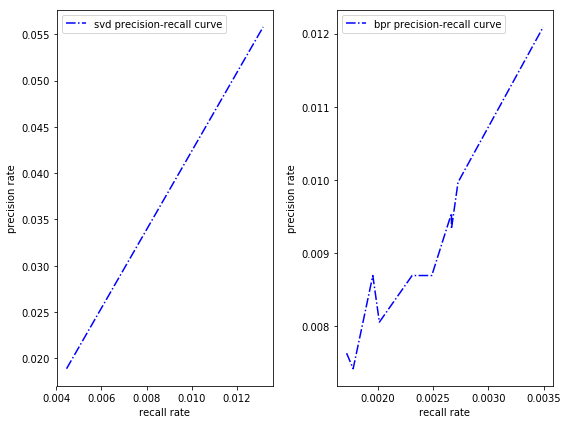

In [42]:
plt.figure(figsize=(8, 6))   
plt.subplot(1,2,1) 
p1 = bpr_svd_factors.sort_values(by='svd_recall')
plt.plot(p1.svd_recall,p1.svd_precision,"b",label='svd precision-recall curve',linestyle='-.')
plt.legend()        
plt.xlabel("recall rate")
plt.ylabel("precision rate")
 
plt.subplot(1,2,2)
p2 = bpr_svd_factors.sort_values(by='bpr_recall')
plt.plot(p2.bpr_recall,p2.bpr_precision,"b",label='bpr precision-recall curve',linestyle='-.')  
plt.legend()
plt.xlabel("recall rate")
plt.ylabel("precision rate")
plt.tight_layout()

plt.show()

These two figures show that both precision and recall are directly proportional to SVD and BPR, and The proportional relationship of SVD is more stable.

**plot f-scores curve**

In [31]:
bpr_svd_factors['f_value_svd'] = 2*bpr_svd_factors.svd_recall*bpr_svd_factors.svd_precision/(bpr_svd_factors.svd_recall + bpr_svd_factors.svd_precision)
bpr_svd_factors['f_value_bpr'] = 2*bpr_svd_factors.bpr_recall*bpr_svd_factors.bpr_precision/(bpr_svd_factors.bpr_recall + bpr_svd_factors.bpr_precision)

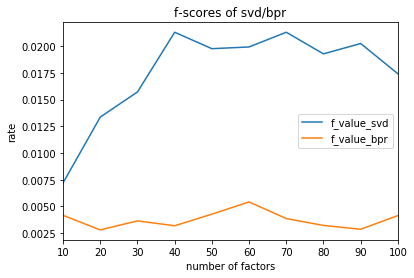

In [32]:
bpr_svd_factors[['f_value_svd','f_value_bpr']].plot()
plt.title("f-scores of svd/bpr")
plt.xlabel("number of factors")
plt.ylabel("rate")
plt.show()

The f value of SVD is significantly larger than BPR, so the accuracy and recall rate of SVD is more effective.

## Conclusion

From the above evaluation results, SVD++ has higher precision and recall rate than BPR in a range of factors and a certain number of recommendations, and also evaluates the effectiveness of BPR evaluation based on evaluation indicators is greater than BPR. From this point of view, when BPR processes implicit data, its precision and recall are far less than explicit data, although its accuracy in ordering is higher.

## Reference

1. [BPR: Bayesian Personalized Ranking from Implicit Feedback](https://arxiv.org/ftp/arxiv/papers/1205/1205.2618.pdf)




2. [Factor in the neighbors: Scalable and accurate collaborative filtering](http://courses.ischool.berkeley.edu/i290-dm/s11/SECURE/a1-koren.pdf)

In [5]:
import sys
sys.path.append(r"C:\\Users\\lenovo\\Desktop\\RS_AE\\RSA\\")

ImportError: cannot import name 'run_func'